In [1]:
!pip install torch_snippets
from torch_snippets import *

     |████████████████████████████████| 56 kB 4.7 MB/s 
     |████████████████████████████████| 57 kB 6.2 MB/s 
     |████████████████████████████████| 209 kB 28.9 MB/s 
     |████████████████████████████████| 51 kB 9.1 MB/s 


2021-08-15 04:12:41.843 | WARNING  | torch_snippets.torch_loader:<module>:233 - Error: No module named 'pytorch_lightning'
Not importing Lightning Report
2021-08-15 04:12:42.397 | WARNING  | torch_snippets:<module>:14 - sklearn is not found. Skipping relevant imports from submodule `sklegos`
Exception: No module named 'sklego'


In [2]:
!wget https://www.dropbox.com/s/mfg1codtc2rue84/g1.png
!wget https://www.dropbox.com/s/4yhui8s1xjndavm/g2.png

--2021-08-15 04:12:42--  https://www.dropbox.com/s/mfg1codtc2rue84/g1.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/mfg1codtc2rue84/g1.png [following]
--2021-08-15 04:12:42--  https://www.dropbox.com/s/raw/mfg1codtc2rue84/g1.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6256d5057795f62e5637719807.dl.dropboxusercontent.com/cd/0/inline/BUQjYjJYoTaP6IYshiZKNynGKFKpO9nhAMqNaefsTkD0-ImjWkjxRj6qFAlmrK8GGDF9v9ROHIRtuyQqItTbkrcT7gRAGhXx3yJG8jQB4N-YQ2h4SuAqgSRUbbKL3Lw-DisL497-drOPRb-Ud9oD25ww/file# [following]
--2021-08-15 04:12:42--  https://uc6256d5057795f62e5637719807.dl.dropboxusercontent.com/cd/0/inline/BUQjYjJYoTaP6IYshiZKNynGKFKpO9nhAMqNaefsTkD0-ImjWkjxRj6qFAlmrK8GGDF9v9ROHIRtuyQqItTbkrcT7gRAGhXx3yJG8jQB4N-

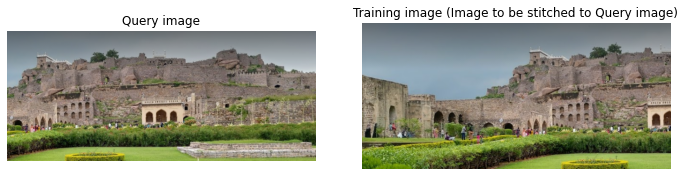

In [6]:
# Train the images and convert into Gray scale

queryImg = read('g1.png', 1)
queryImg_gray = read('g1.png')

trainImg = read('g2.png', 1)
trainImg_gray = read('g2.png')

subplots([trainImg, queryImg], nc=2, figsize=(10,5), titles = ['Query image','Training image (Image to be stitched to Query image)'])

In [7]:
# feature_extractor = 'orb' 
# feature_matching = 'bf'

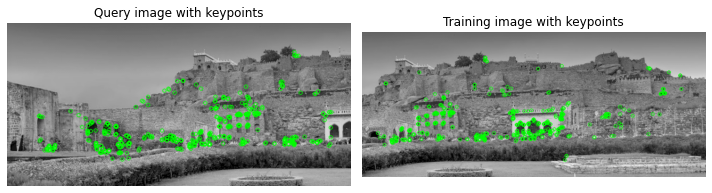

In [9]:
# fetch the keypoints and features corresponding  to the images

descriptor = cv2.ORB_create()
kpsA, featuresA = descriptor.detectAndCompute(trainImg_gray, None)
kpsB , featuresB = descriptor.detectAndCompute(queryImg_gray,None)


# Draw  the keypoints obtained on images

img_kpsA = cv2.drawKeypoints(trainImg_gray,kpsA,None,color=(0,255,0))
img_kpsB = cv2.drawKeypoints(queryImg_gray,kpsB,None,color=(0,255,0))


subplots([img_kpsB, img_kpsA], nc=2, figsize=(10,5), titles=['Query image with keypoints','Training image with keypoints'])


# feature matching

In [ ]:
# feature_matching = 'bf'

In [10]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING)
best_matches =  bf.match(featuresA,featuresB)
matches = sorted(best_matches,key=lambda x:x.distance)

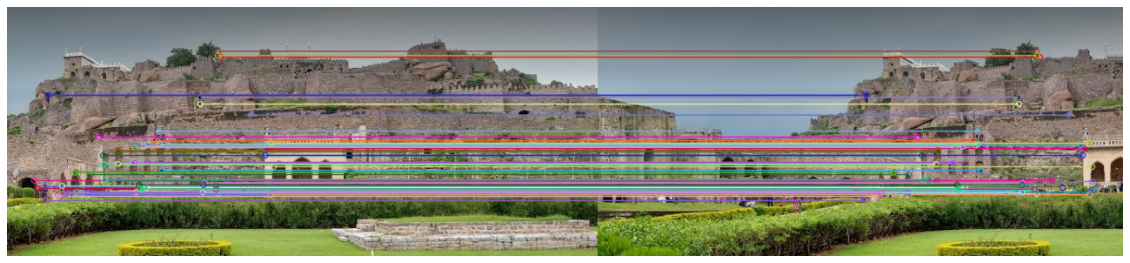

In [15]:
img3 = cv2.drawMatches(trainImg,kpsA,queryImg,kpsB,matches[:100],                           None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
show(img3)

In [16]:
# fetch the homography corresponding to the two images..

kpsA = np.float32([kp.pt for kp in kpsA])
kpsB = np.float32([kp.pt for kp in kpsB])
ptsA = np.float32([kpsA[m.queryIdx] for m in matches])
ptsB = np.float32([kpsB[m.trainIdx] for m in matches])

(H, status) = cv2.findHomography(ptsA, ptsB, cv2.RANSAC,4)

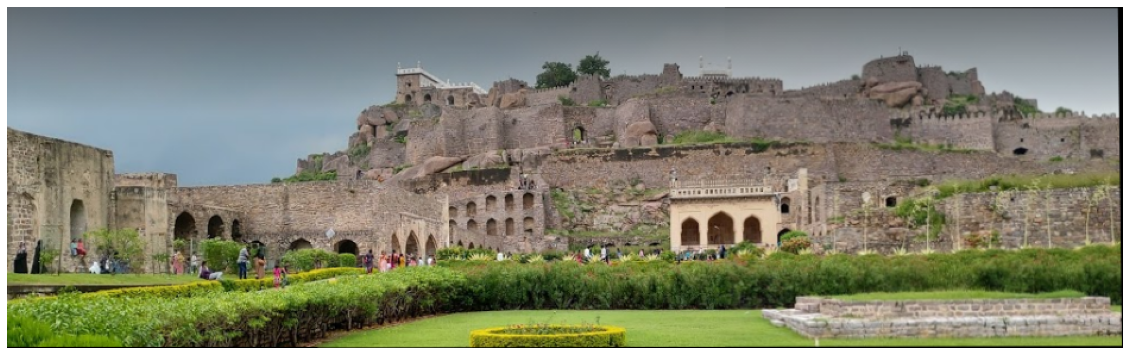

In [17]:
width = trainImg.shape[1] + queryImg.shape[1]
height = trainImg.shape[0] + queryImg.shape[0]

result = cv2.warpPerspective(trainImg, H, (width, height))
result[0:queryImg.shape[0], 0:queryImg.shape[1]] = queryImg

_x = np.nonzero(result.sum(0).sum(-1) == 0)[0][0]
_y = np.nonzero(result.sum(1).sum(-1) == 0)[0][0]

show(result[:_y,:_x])